In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from evaluation import get_true_positives, get_false_positives, get_false_negatives, compute_intersection_over_union, evaluate

In [2]:
ground_truth_path = '../data/ground_truth_test.csv'
predictions_path = '../data/predictions_test.csv'

In [3]:
ground_truth_df = pd.read_csv(ground_truth_path)
predictions_df = pd.read_csv(predictions_path)

precision_buffer, recall_buffer = [], []

for threshold in np.arange(0, 1, 0.05):
    tp_combined, tp_gt, tp_pred = get_true_positives(ground_truth_df, predictions_df, confidence_threshold=threshold)
    tp_combined['iou'] = compute_intersection_over_union(tp_gt, tp_pred)
    
    fp = get_false_positives(predictions_df, tp_pred)
    fn = get_false_negatives(ground_truth_df, tp_gt)
    
    metrics = evaluate(tp_combined, fp, fn)
    
    precision_buffer.append(metrics['precision'])
    recall_buffer.append(metrics['recall'])

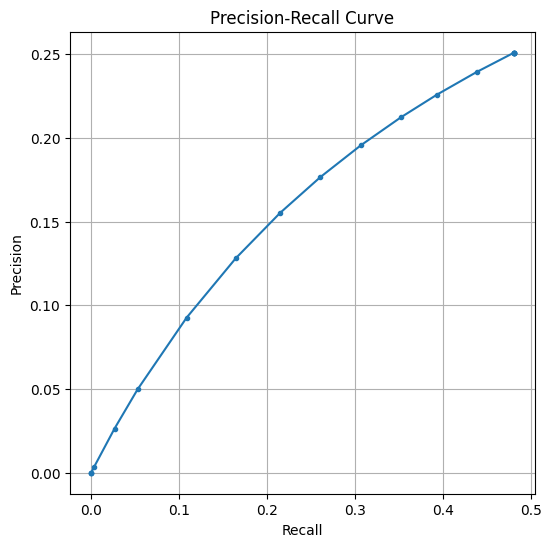

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(recall_buffer, precision_buffer, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()